# 載入所需套件

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter
import seaborn as sns
import mpl_finance as mpf
import datetime
import talib
%matplotlib inline

style.use('seaborn')
#設定字體和解決圖像中文顯示問題
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus']=False

# 設定日期抓取Yahoo Finance 台積電(2330.TW)股價資料

In [2]:
#設定起始和結束日期
start=datetime.datetime(2019,1,1)
end=datetime.datetime.now()

#抓取資料
df=pdr.DataReader('2330.TW','yahoo',start=start,end=end)
df.index=df.index.format(formatter=lambda x:x.strftime('%Y-%m-%d'))

# 檢視抓取股價資料

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
2019-01-02,226.5,219.0,226.5,219.5,32900482.0,205.654404
2019-01-03,218.0,214.0,214.0,215.5,34087620.0,201.906723
2019-01-04,211.5,206.5,211.5,208.0,65943521.0,194.879807
2019-01-07,214.0,211.0,212.0,213.0,35442176.0,199.564438
2019-01-08,212.5,210.0,212.0,211.0,22694481.0,197.690598


# 設定每日價差、每日報酬率、每日標準化報酬率

In [4]:
#每日價差
spread=df['Close'].diff()[1:]
#每日報酬率
returns=df['Close'].pct_change()[1:]
#每日標準化報酬率
norm_returns=(returns-returns.mean())/returns.std()

# 繪製每日價差、每日報酬率、每日標準化報酬率折線圖

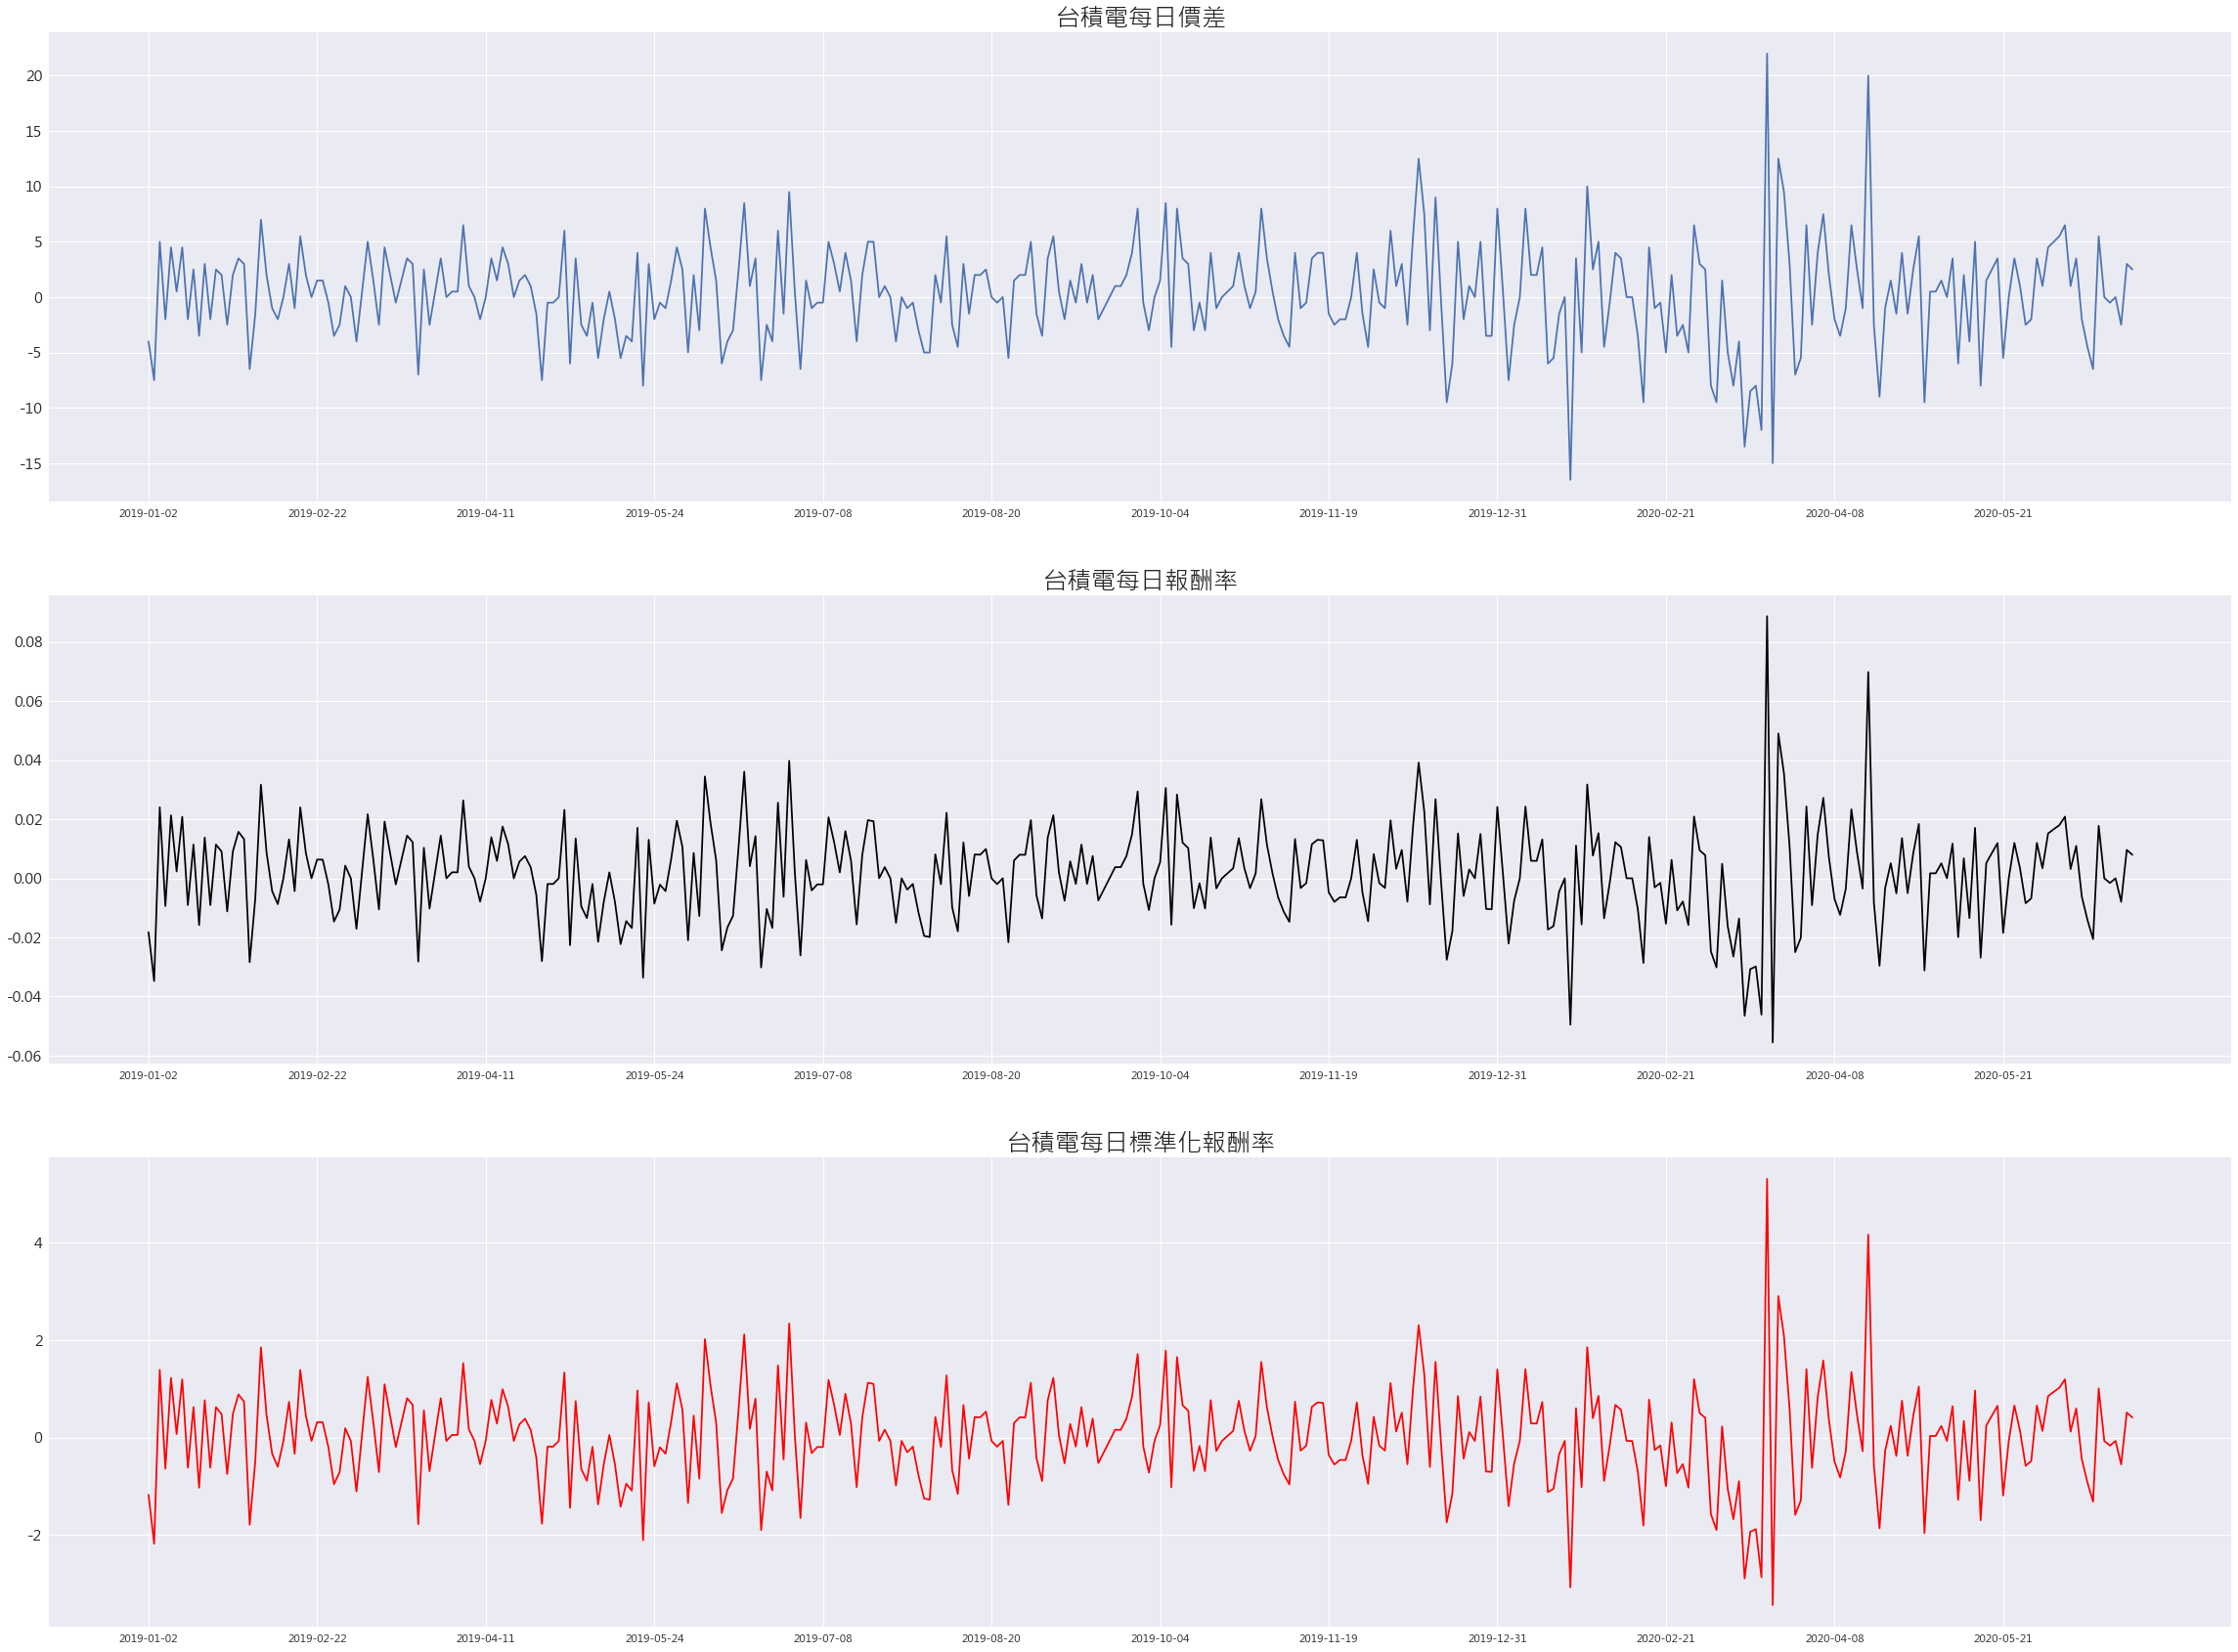

In [5]:
fig,axes=plt.subplots(3,figsize=(40,30),sharex=True)
#每日價差折線圖
axes[0].plot(spread)
axes[0].set_xticks(range(0,len(df.index),30))
axes[0].set_xticklabels(df.index[::30],fontsize=11)
axes[0].set_title('台積電每日價差',fontsize=25)
axes[0].tick_params(axis='x',labelbottom=True)
axes[0].tick_params(axis='y',labelsize=15)


#每日報酬率折線圖
axes[1].plot(returns,color='k')
axes[1].set_xticks(range(0,len(df.index),30))
axes[1].set_xticklabels(df.index[::30],fontsize=11)
axes[1].set_title('台積電每日報酬率',fontsize=25)
axes[1].tick_params(axis='x',labelbottom=True)
axes[1].tick_params(axis='y',labelsize=15)


#每日標準化報酬率折線圖
axes[2].plot(norm_returns,color='r')
axes[2].set_xticks(range(0,len(df.index),30))
axes[2].set_xticklabels(df.index[::30],fontsize=11)
axes[2].set_title('台積電每日標準化報酬率',fontsize=25)
axes[2].tick_params(axis='y',labelsize=15)

# 繪製每日報酬率柱狀圖

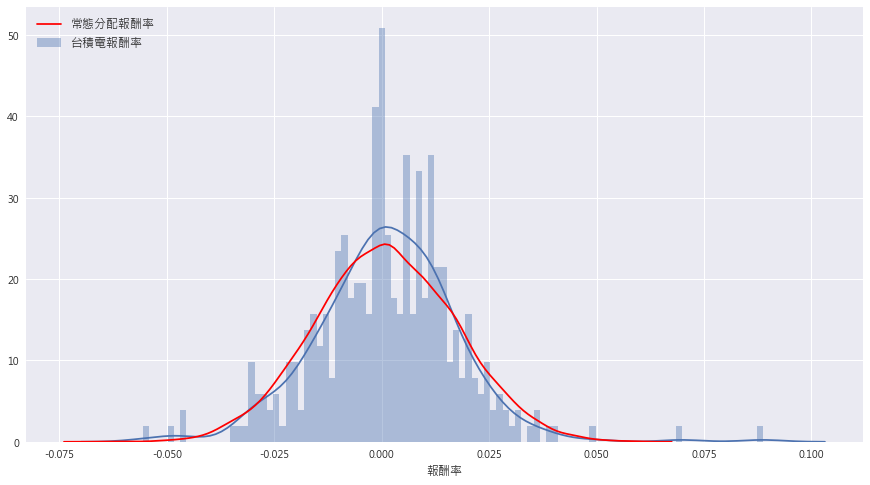

In [6]:
fig,ax=plt.subplots(1,figsize=(15,8))
sns.distplot(returns,bins=100,ax=ax,label='台積電報酬率')
sns.distplot(np.random.normal(np.mean(returns),np.std(returns),10000),bins=100,color='r',ax=ax,
             label='常態分配報酬率',hist=False)
#ax.grid()
ax.set_xlabel('報酬率',fontsize=12)
ax.legend(loc='upper left',fontsize=12)

# 設定30日移動波動度

In [7]:
rolling_std=returns.rolling(30).std()

# 繪製30日移動波動度折線圖

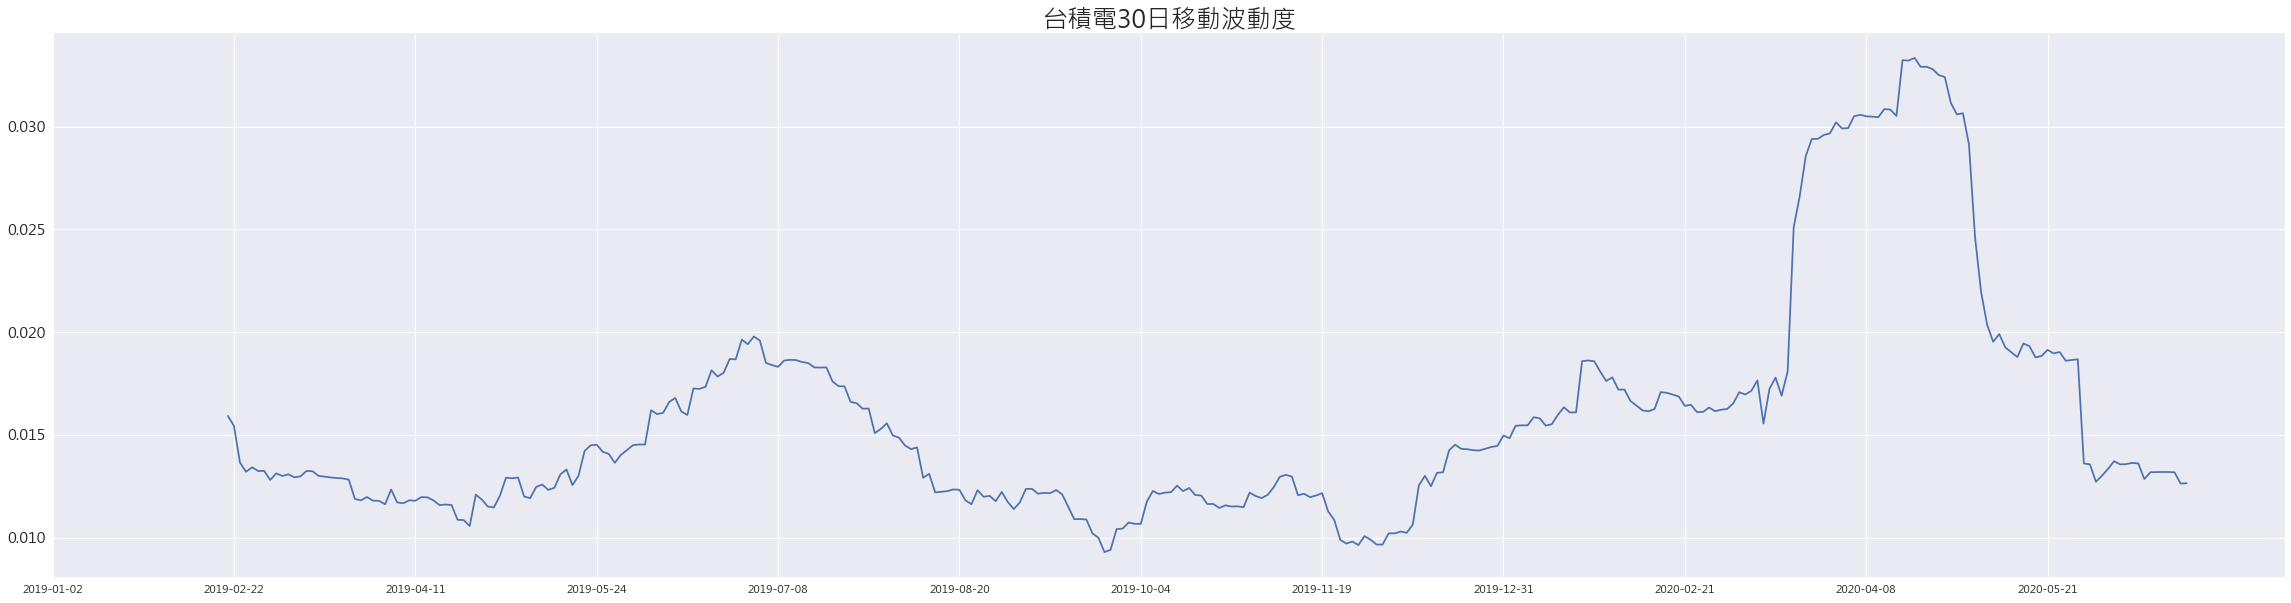

In [8]:
fig,ax=plt.subplots(1,figsize=(40,10))
ax.plot(rolling_std)
ax.set_xticks(range(0,len(df.index),30))
ax.set_xticklabels(df.index[::30],fontsize=11)
ax.set_title('台積電30日移動波動度',fontsize=25)
#ax.grid()
ax.tick_params(axis='y',labelsize=15)

# 設定10日/30日移動平均值

In [9]:
df['MA_10']=df['Close'].rolling(10).mean()
df['MA_30']=df['Close'].rolling(30).mean()

# 設定布林通道

In [10]:
df['H_line'],df['M_line'],df['L_line']=talib.BBANDS(df['Close'],timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)

# 設定KD值

In [11]:
df['K'],df['D']=talib.STOCH(df['High'],df['Low'],df['Close'])

# 設定5日/10日RSI值

In [12]:
df['RSI_5']=talib.RSI(np.array(df['Close']),5)
df['RSI_10']=talib.RSI(np.array(df['Close']),10)

# 設定MACD值和柱狀圖顏色

In [13]:
df['MACD'],df['MACD_Signal'],df['MACD_Hist']=talib.MACD(df['Close'],fastperiod=12,slowperiod=26,signalperiod=9)
red_hist=np.where(df['MACD_Hist']>0,df['MACD_Hist'],0)
green_hist=np.where(df['MACD_Hist']<0,df['MACD_Hist'],0)

# 檢視新增項目後股價資料

In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,MA_10,MA_30,H_line,M_line,L_line,K,D,RSI_5,RSI_10,MACD,MACD_Signal,MACD_Hist
2020-06-18,315.0,313.0,314.5,314.5,29044474.0,314.5,316.15,302.566667,327.711744,306.125,284.538256,45.645646,30.810120,54.194801,59.418121,5.615284,5.220059,0.395225
2020-06-19,314.5,312.0,314.0,314.5,48130280.0,314.5,316.45,303.133333,328.107852,307.250,286.392148,56.156156,42.342342,54.194801,59.418121,5.387611,5.253570,0.134041
2020-06-22,316.5,312.0,314.5,312.0,37374616.0,312.0,315.85,303.500000,327.974350,308.250,288.525650,44.444444,48.748749,42.727747,54.254628,4.948407,5.192537,-0.244130
2020-06-23,316.5,312.5,316.0,315.0,41300084.0,315.0,315.45,304.166667,328.247290,309.225,290.202710,42.222222,47.607608,56.525783,59.004673,4.787225,5.111475,-0.324250
2020-06-24,320.0,316.0,319.0,317.5,54147024.0,317.5,314.95,304.850000,328.680094,310.275,291.869906,42.916667,43.194444,65.247272,62.600453,4.805818,5.050343,-0.244525


# 繪製股價技術分析圖

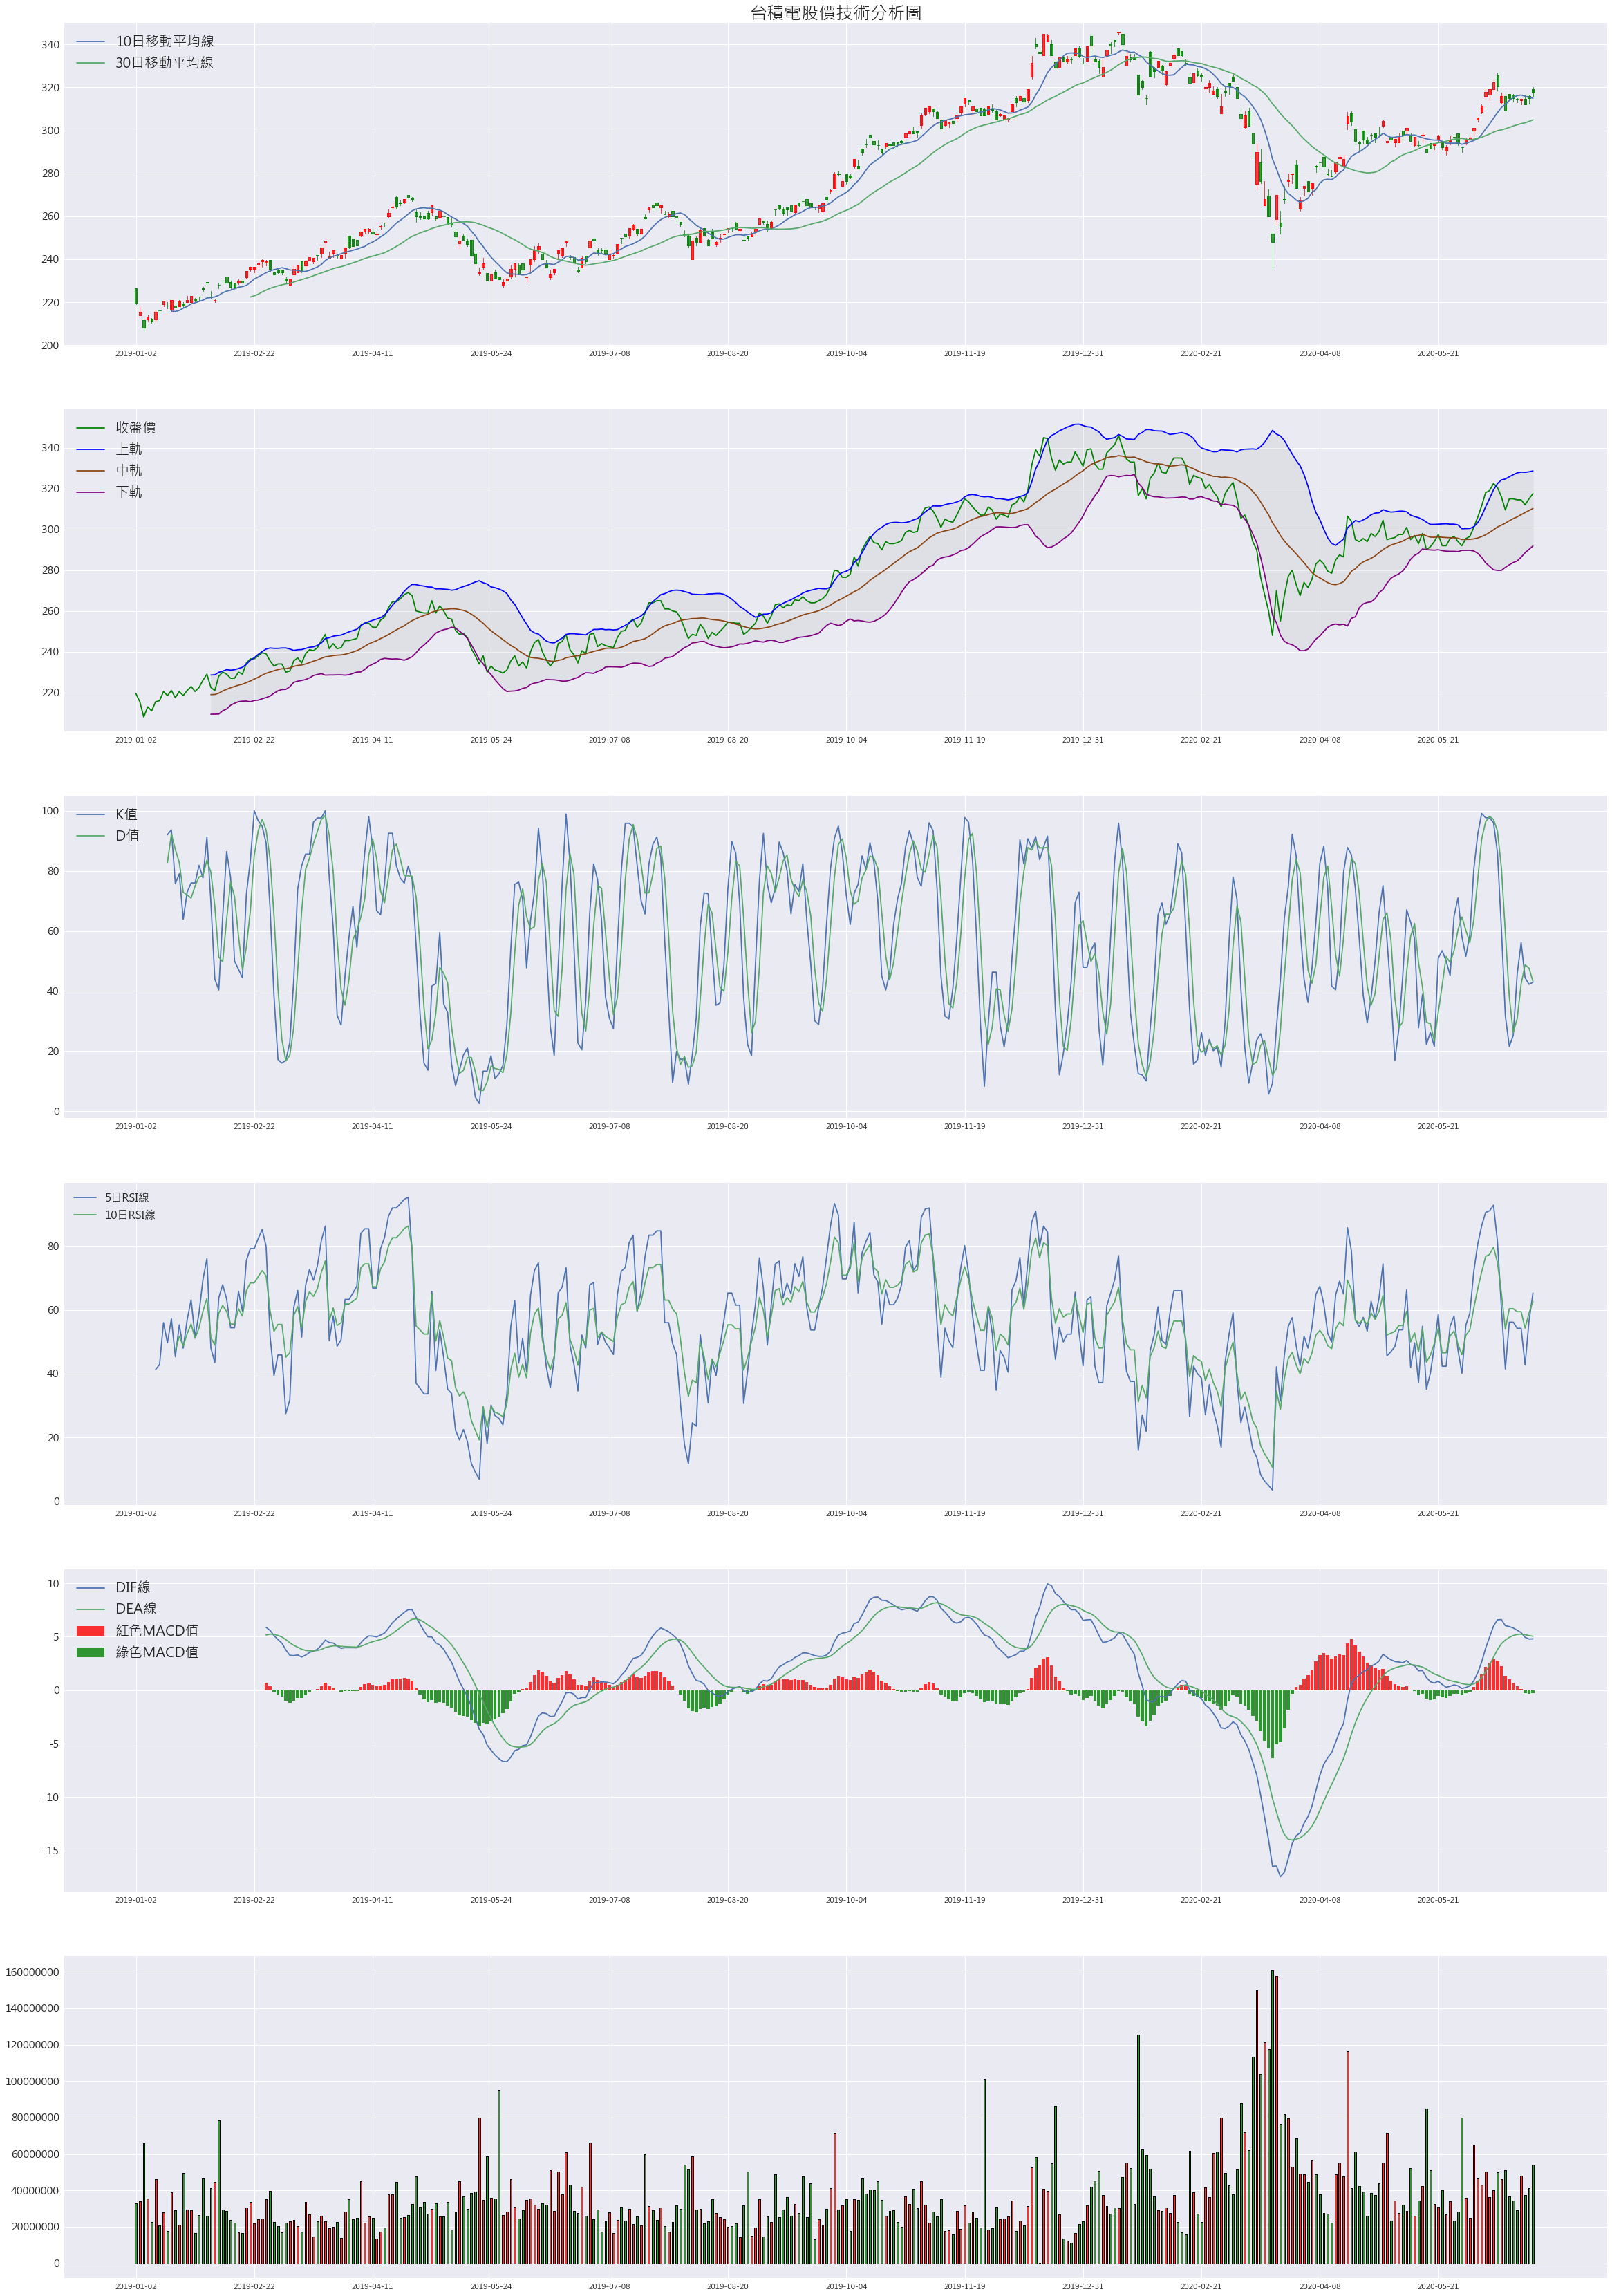

In [15]:
fig,axes=plt.subplots(6,figsize=(40,60),sharex=True)
#K線+10日/30日移動平均線
mpf.candlestick2_ochl(axes[0],df['Open'],df['Close'],df['High'],df['Low'],width=0.6,colorup='r',colordown='g',alpha=0.75)
axes[0].plot(df['MA_10'],label='10日移動平均線')
axes[0].plot(df['MA_30'],label='30日移動平均線')
axes[0].set_xticks(range(0,len(df.index),30))
axes[0].set_xticklabels(df.index[::30],fontsize=11)
axes[0].set_ylim(200,350)
axes[0].legend(fontsize=20,loc='upper left')
axes[0].tick_params(axis='x',labelbottom=True)
axes[0].tick_params(axis='y',labelsize=15)
axes[0].set_title('台積電股價技術分析圖',fontsize=25)


#布林通道
axes[1].plot(df['Close'],color='g',label='收盤價')
axes[1].plot(df['H_line'],color='b',label='上軌')
axes[1].plot(df['M_line'],color='saddlebrown',label='中軌')
axes[1].plot(df['L_line'],color='purple',label='下軌')
axes[1].fill_between(df.index,df['L_line'],df['H_line'],color='gray',alpha=0.1)
axes[1].set_xticks(range(0,len(df.index),30))
axes[1].set_xticklabels(df.index[::30],fontsize=11)
axes[1].legend(fontsize=20,loc='upper left')
axes[1].tick_params(axis='x',labelbottom=True)
axes[1].tick_params(axis='y',labelsize=15)


#KD值
axes[2].plot(df['K'],label='K值')
axes[2].plot(df['D'],label='D值')
axes[2].set_xticks(range(0,len(df.index),30))
axes[2].set_xticklabels(df.index[::30],fontsize=11)
axes[2].legend(fontsize=20,loc='upper left')
axes[2].tick_params(axis='x',labelbottom=True)
axes[2].tick_params(axis='y',labelsize=15)


#5日RSI/10日RSI線
axes[3].plot(df['RSI_5'],label='5日RSI線')
axes[3].plot(df['RSI_10'],label='10日RSI線')
axes[3].set_xticks(range(0,len(df.index),30))
axes[3].set_xticklabels(df.index[::30],fontsize=11)
axes[3].legend(fontsize=16,loc='upper left')
axes[3].tick_params(axis='x',labelbottom=True)
axes[3].tick_params(axis='y',labelsize=15)


#MACD線和柱狀圖
axes[4].plot(df['MACD'],label='DIF線')
axes[4].plot(df['MACD_Signal'],label='DEA線')
axes[4].bar(np.arange(len(df.index)),red_hist,label='紅色MACD值',color='r',alpha=0.8)
axes[4].bar(np.arange(len(df.index)),green_hist,label='綠色MACD值',color='g',alpha=0.8)
axes[4].set_xticks(range(0,len(df.index),30))
axes[4].set_xticklabels(df.index[::30],fontsize=11)
axes[4].legend(fontsize=20,loc='upper left')
axes[4].tick_params(axis='x',labelbottom=True)
axes[4].tick_params(axis='y',labelsize=15)


#成交量
mpf.volume_overlay(axes[5],df['Open'],df['Close'],df['Volume'],width=0.5,colorup='r',colordown='g',alpha=0.8)
axes[5].set_xticks(range(0,len(df.index),30))
axes[5].set_xticklabels(df.index[::30],fontsize=11)
axes[5].tick_params(axis='y',labelsize=15)
axes[5].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))